# Marketing Analytics

In today's competitive business landscape, understanding consumer behavior and preferences is crucial for creating effective marketing strategies. Market segmentation, a core element of the segmentation, targeting, and positioning (STP) framework, helps companies tailor their strategies to meet diverse customer needs. This case study focuses on analyzing consumer segments using data from a smartwatch survey, with the goal of identifying distinct market segments and recommending strategic actions for Intel. By applying cluster analysis, we uncover meaningful insights that inform how Intel can optimize its marketing strategies and strengthen its position in the highly competitive smartwatch market.

In [5]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Jupyter notebooks or IPython environments
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Set BASE_DIR to the current working directory
BASE_DIR = os.getcwd()

# Use BASE_DIR to construct the path to the file
SEG = os.path.join(BASE_DIR, "Documents", "Downloads", "SmartWatch Data File.xlsx")

# Proceed with loading the dataset
import pandas as pd

df_new = pd.read_excel(SEG)

In [8]:
corr = df_new.corr()
corr_list=[]
for i in range(0, len(corr.index)):
    for j in range(0, len(corr.columns)):
        if ((corr.iloc[i,j] > 0.5 or corr.iloc[i,j] < -0.5) and corr.iloc[i,j] != 1):
            corr_list.append(str(corr.index[i] + ' and ' + corr.columns[j] + ' : ' + str(round(corr.iloc[i,j], 2))))       

corr_list = '\n'.join(corr_list)
print(corr_list)

Wellness and Athlete : 0.66
Wellness and Style : 0.63
Wellness and Age : -0.52
Athlete and Wellness : 0.66
Athlete and Age : -0.69
Style and Wellness : 0.63
Age and Wellness : -0.52
Age and Athlete : -0.69


In [9]:
X = df_new.copy()

In the smartwatch dataset, all attributes except for 'Age' are already on a similar scale. Evgeniou highlights that the results can be significantly influenced by variables with differing ranges. Therefore, in this case, the 'Age' attribute was standardized and replaced with the original attribute to ensure consistency in the analysis.

In [10]:
from sklearn.preprocessing import StandardScaler
scaled_X = StandardScaler().fit_transform(X[['Age']])
X[['Age']] = scaled_X

In [11]:
X

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age
0,3,2,3,3,2,3,3,1,1,1,2,0.423752
1,6,6,6,6,5,3,1,1,0,2,3,0.423752
2,7,4,4,4,6,4,1,0,0,1,3,1.105848
3,7,5,4,5,5,4,4,1,0,2,5,-0.087820
4,7,4,2,6,3,2,4,1,0,1,3,0.082704
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,5,5,4,6,5,6,1,0,2,4,0.253228
996,7,7,6,5,5,2,5,1,0,1,5,0.082704
997,5,6,7,7,4,3,5,1,0,1,5,0.764800
998,1,1,4,3,2,4,3,1,0,1,1,0.594276


In this analysis, I began by applying the silhouette method to determine the optimal number of clusters. The silhouette score measures how well each point lies within its assigned cluster, with higher scores indicating better-defined clusters. After evaluating the results, the silhouette method suggested that the optimal number of clusters is k=2, as it provided the highest average silhouette score.

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Your DataFrame X
# X = ...

# Range of k values to try
k_values = range(2, 11)

# List to store silhouette scores
silhouette_scores = []

# Loop through each k value
for k in k_values:
    # Initialize KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(X)
    
    # Get cluster labels
    labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)
    
    # Append silhouette score to list
    silhouette_scores.append(silhouette_avg)

# Find the best value of k based on maximum silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]

print("Best value of k:", best_k)

Best value of k: 2


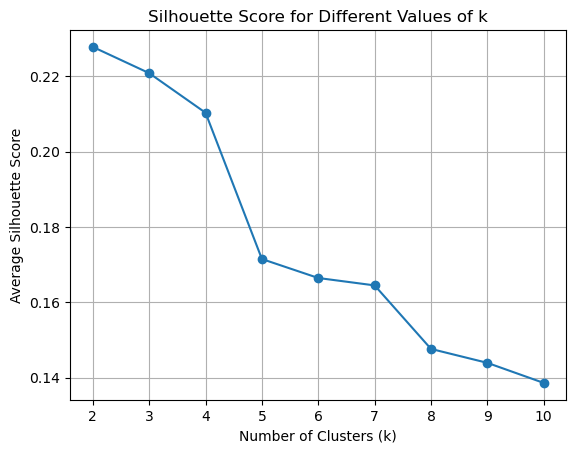

In [13]:
import matplotlib.pyplot as plt

# Plotting the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.grid(True)
plt.show()

Although the silhouette method suggested that k=2 might be optimal, I chose to apply the elbow method for additional validation. The elbow method helps determine the point where increasing the number of clusters no longer significantly reduces the within-cluster variance. Upon reviewing the results, the elbow method indicated that the optimal number of clusters is k=4, providing a clearer picture of the appropriate number of clusters for further analysis.

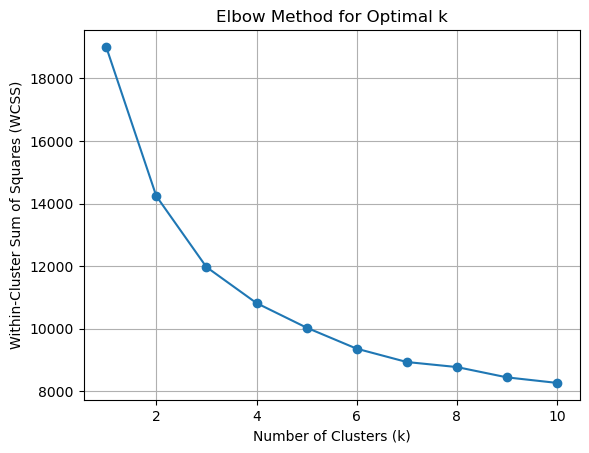

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of k values to try
k_values = range(1, 11)

# List to store WCSS
wcss = []

# Loop through each k value
for k in k_values:
    # Initialize KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(X)
    
    # Append WCSS to list
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

To better understand the structure of the data, I used hierarchical clustering and displayed the results with a dendrogram. Hierarchical clustering groups data by gradually merging similar points into clusters. The dendrogram is a tree-like diagram that shows how these clusters form. Each branch represents a cluster, and the height where two branches join shows how different the clusters are. By looking at the dendrogram, we can see how the data naturally groups together and choose the number of clusters by cutting the tree at a certain point. This method helped us see the relationships between different data points and clusters more clearly.

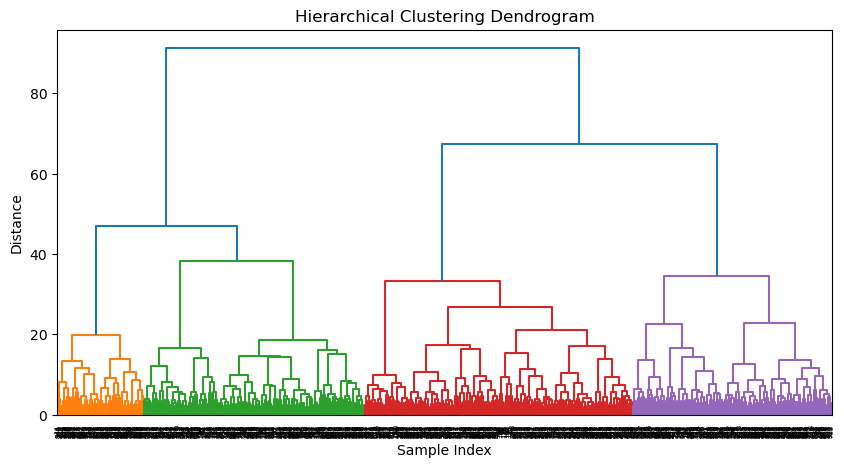

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Calculate distance matrix with Euclidean distance
Y = pdist(X, metric='euclidean')

# Clustering algorithm
fit = linkage(Y, method='ward')

# Display dendrogram
plt.figure(figsize=(10, 5))
dendrogram(fit, color_threshold=40)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Cut dendrogram into 4 clusters
cluster = cut_tree(fit, n_clusters=4)

The dendrogram visualizes the hierarchical clustering of data points into four distinct clusters, represented by the colors orange, green, red, and purple. This configuration suggests that k=4 clusters provide a clear segmentation of the data based on their similarities and differences.

In this section, we integrate the derived cluster labels into our original dataset to better visualize the segmentation. Following this, we calculate and present the proportions of data points within each cluster, offering a clear perspective on the distribution across the identified segments.

In [16]:
import pandas as pd

# Add cluster to original data set
df_final = pd.concat([df_new, pd.Series(cluster.flatten(), name='cluster')], axis=1)

# View the new data frame
df_final

,ConstCom,TimelyInf,TaskMgm,DeviceSt,Wellness,Athlete,Style,AmznP,Female,Degree,Income,Age,cluster
0,3,2,3,3,2,3,3,1,1,1,2,38,0
1,6,6,6,6,5,3,1,1,0,2,3,38,1
2,7,4,4,4,6,4,1,0,0,1,3,42,1
3,7,5,4,5,5,4,4,1,0,2,5,35,1
4,7,4,2,6,3,2,4,1,0,1,3,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,5,5,4,6,5,6,1,0,2,4,37,2
996,7,7,6,5,5,2,5,1,0,1,5,36,1
997,5,6,7,7,4,3,5,1,0,1,5,40,1
998,1,1,4,3,2,4,3,1,0,1,1,39,0


In [17]:
# Calculate segment size in percentages
proportions = df_final['cluster'].value_counts(normalize=True) * 100
print(proportions)

cluster
0    34.6
2    28.5
1    25.7
3    11.2
Name: proportion, dtype: float64


We analyze each cluster by calculating the mean and median values of key attributes such as communication preferences, device features, demographic information, and more. This analysis helps in identifying unique characteristics of each cluster, facilitating targeted marketing and product strategies.

In [18]:
# Explore mean values of variables in clusters
segments = df_final.groupby('cluster').agg({
    'ConstCom': ['mean', 'median'],
    'TimelyInf': ['mean', 'median'],
    'TaskMgm': ['mean', 'median'],
    'DeviceSt': ['mean', 'median'],
    'Wellness': ['mean', 'median'],
    'Athlete': ['mean', 'median'],
    'Style': ['mean', 'median'],
    'AmznP': ['mean', 'median'],
    'Female': ['mean', 'median'],
    'Degree': ['mean', 'median'],
    'Income': ['mean', 'median'],
    'Age': ['mean', 'median']
}).reset_index()

import pandas as pd

# Set the maximum number of rows and columns displayed to None
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the DataFrame
print(segments)

  cluster  ConstCom        TimelyInf          TaskMgm         DeviceSt         \
               mean median      mean median      mean median      mean median   
0       0  3.921965    4.0  3.387283    3.0  3.173410    3.0  2.517341    3.0   
1       1  5.346304    5.0  5.338521    5.0  4.556420    4.0  4.891051    5.0   
2       2  5.294737    5.0  4.568421    5.0  5.540351    6.0  3.985965    4.0   
3       3  4.017857    4.0  3.964286    4.0  3.053571    3.0  5.142857    5.0   

   Wellness          Athlete            Style            AmznP         \
       mean median      mean median      mean median      mean median   
0  3.130058    3.0  3.049133    3.0  3.583815    4.0  0.416185    0.0   
1  3.926070    4.0  2.754864    3.0  3.739300    4.0  0.509728    1.0   
2  5.947368    6.0  4.771930    5.0  5.557895    6.0  0.663158    1.0   
3  5.178571    5.0  6.169643    6.0  4.589286    4.0  0.892857    1.0   

     Female           Degree           Income               Age         
 

In [21]:
segments_transposed = segments.set_index('cluster').T
print(segments_transposed)

cluster                   0          1          2          3
ConstCom  mean     3.921965   5.346304   5.294737   4.017857
          median   4.000000   5.000000   5.000000   4.000000
TimelyInf mean     3.387283   5.338521   4.568421   3.964286
          median   3.000000   5.000000   5.000000   4.000000
TaskMgm   mean     3.173410   4.556420   5.540351   3.053571
          median   3.000000   4.000000   6.000000   3.000000
DeviceSt  mean     2.517341   4.891051   3.985965   5.142857
          median   3.000000   5.000000   4.000000   5.000000
Wellness  mean     3.130058   3.926070   5.947368   5.178571
          median   3.000000   4.000000   6.000000   5.000000
Athlete   mean     3.049133   2.754864   4.771930   6.169643
          median   3.000000   3.000000   5.000000   6.000000
Style     mean     3.583815   3.739300   5.557895   4.589286
          median   4.000000   4.000000   6.000000   4.000000
AmznP     mean     0.416185   0.509728   0.663158   0.892857
          median   0.000

Cluster 1 - Middle Working Class: This group, making up 31.4% of your sample, shows a moderate interest in features like constant communication (3.71) and style (3.54). They tend to prefer subtle notifications and value a stylish smartwatch. However, they have lower expectations for device sturdiness (2.5) and wellbeing features (2.9). The average age in this cluster is 39, with an annual income between 40k USD and 70k USD. Predominantly male, many in this group do not have an Amazon Prime account and show minimal online shopping activity, indicating a limited interest in smartwatches.

Cluster 2 - Tech-Savvy High Class: Comprising 17% of your respondents, this cluster values timely information highly, with an average rating of 5.77, and overall mean feature ratings tending to be high, such as device sturdiness (5.32) and task management (4.88). Less concerned with wellness and athletic features, they prefer smartwatches that support productivity, including traffic and weather updates. The average age here is also 39, but with a higher income range from 101K USD to 175KUSD. Mostly male, this group prioritizes technology and productivity features, reflected in their cluster naming.

Cluster 3 - All-Rounder Class: Comprising the largest segment at 40.2% of the client base, this cluster places high importance on wellness (5.59), communication (5.41), style (5.12), and task management (5.17). This mostly female group seeks multifunctional smartwatches that blend automatic task handling with discreet notifications. While sturdiness is less critical (3.85), the focus is on high performance across all features. The average age is 33, with incomes ranging from 71K USD to 100K USD. Most possess an Amazon Prime account, reflecting their well-educated, tech-savvy nature and high standards for quality and functionality.

Cluster 4 - Fitness-Oriented Class: The smallest group at 11.4%, this cluster is intensely focused on health (5.22) and athletic features (6.18). They value rapid information access and open communication channels, though task management is less of a concern. Predominantly young females, with an average age of 28 and incomes between 71K USD to 100K USD, they embody a tech-savvy, health-conscious demographic. Most have Amazon Prime, indicating active online engagement. Their preference for stylish smartwatches makes them a vital target for high-performance smartwatch products, particularly those enhancing health monitoring.